In [1]:
# importing Pandas
import pandas as pd

# importing NumPy
import numpy as np


**Data Dict:**<br>
The dataset contains information about gender, height, weight and BMI index of individuals

**`Gender`** : Male / Female

**`Height`** : Number (cm)

**`Weight`** : Number (Kg)

**`Index`** :

0 - Extremely Weak,
1 - Weak,
2 - Normal,
3 - Overweight,
4 - Obesity,
5 - Extreme Obesity

In [2]:
# read data
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

#data.head()

data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
# We need to calculate BMI which can be done using Height and Weight features
data['Height_meters'] = data['Height'] / 100
data['calculated_BMI'] = data['Weight'] / (data['Height_meters'] ** 2)

# print head of data

data.head()

,Gender,Height,Weight,Index,Height_meters,calculated_BMI
0,Male,174,96,4,1.74,31.708284
1,Male,189,87,2,1.89,24.355421
2,Female,185,110,4,1.85,32.140248
3,Female,195,104,3,1.95,27.350427
4,Male,149,61,3,1.49,27.476240


In [4]:
max_height = data['Height'].max()
data['deviation_from_max_height'] = data['Height'] - max_height

min_weight = data['Weight'].min()
data['deviation_from_min_weight'] = data['Weight'] - min_weight

avg_bmi = data['calculated_BMI'].mean()
data['deviation_from_avg_BMI'] = data['calculated_BMI'] - avg_bmi

#See how it affected our data, print head of data
data.head()


,Gender,Height,Weight,Index,Height_meters,calculated_BMI,deviation_from_max_height,deviation_from_min_weight,deviation_from_avg_BMI
0,Male,174,96,4,1.74,31.708284,-25,46,-6.057000
1,Male,189,87,2,1.89,24.355421,-10,37,-13.409863
2,Female,185,110,4,1.85,32.140248,-14,60,-5.625036
3,Female,195,104,3,1.95,27.350427,-4,54,-10.414857
4,Male,149,61,3,1.49,27.476240,-50,11,-10.289044


In [5]:
# read train csv data
data = pd.read_csv('train.csv')

# print head

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# drop cols which have more than 70% null values using thresh parameter
d1= data.drop(data.columns[data.isnull().mean() > 0.7], axis=1)


In [7]:
threshold = 0.7
#filter columns with mean missing value higher than threshold
data = data.loc[:, data.isnull().mean() <= threshold]


#filter rows with mean missing value rate higher than threshold
data = data = data.loc[data.isnull().mean(axis=1) <= threshold, :]


# print data
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
# check null counts in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
# Filling missing values with medians of Age column
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)
# print head of data

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# Check again total number of nan in each feature
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
# lets impute nan in column Embarked with maximum occured values in it. 
mode_Emb = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(mode_Emb)

In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
#We will need same data for other techniques as well so better we leave originial undisturbed by copying it into new_data
data = pd.read_csv('train.csv')
new_data  = data.copy()
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
# Lets define our factor=3 as our factor to calculate our limit
factor = 3

# Calculate upper limit and lower limit  of 'Fare' column to decide the threshold to detect outlier
#Hint use: upper_lim=mean+std*factor
#          loeer_lim=mean-std*factor
upper_lim = new_data['Fare'].mean()+new_data['Fare'].std()*factor
lower_lim = new_data['Fare'].mean()-new_data['Fare'].std()*factor

In [15]:
#Now filter our 'Fare' with data lower than upper_lim and greater than lower_lim
new_data = new_data[(new_data['Fare']> lower_lim) & (new_data['Fare']< upper_lim)]

#print the length of original and new data
print('Length of the original data:', len(data))
print('Length of the new data:',len(new_data))

Length of the original data: 891
Length of the new data: 871


In [16]:
#copy data again into new_data
new_data = data.copy()

#create upper and lower limits for column 'Fare' based on 95% and 5% respectively.
upper_lim = new_data['Fare'].quantile(0.95)
lower_lim = new_data['Fare'].quantile(0.05)

#Dropping the outlier rows in 'Fare' with your created limited.
new_data =new_data[(new_data['Fare']> lower_lim) & (new_data['Fare'] < upper_lim)]

#print the length of both original and new data after filter
print('Length of the original data:', len(data))
print('Length of the new data:',len(new_data))



Length of the original data: 891
Length of the new data: 791


In [17]:
#copy data into new_data
new_data = data.copy()

#create upper and lower limits for column 'Fare' based on 95% and 5% respectively.
upper_lim =  new_data['Fare'].quantile(0.95)
lower_lim = new_data['Fare'].quantile(0.05)

#Capping the outlier rows with Percentiles
new_data.loc[new_data['Fare'] > upper_lim, 'Fare'] = upper_lim
new_data.loc[new_data['Fare'] < lower_lim, 'Fare'] = lower_lim

# print length of original and new data after capping.
print('Length of the original data:', len(data))
print('Length of the new data:',len(new_data))

Length of the original data: 891
Length of the new data: 891


In [18]:
# copy the data into new_data
new_data = data.copy()

#Normalizing the Age column using the given formula 
new_data['Age'] = (new_data['Age'] - new_data['Age'].min()) / (new_data['Age'].max() - new_data['Age'].min())

#Normalizing the Fare column using the given formula
new_data['Fare'] =(new_data['Fare'] - new_data['Fare'].min()) / (new_data['Fare'].max() - new_data['Fare'].min())

# print head
new_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,NaN,S


#### **`2. Standardization`**
Z = (X - Xmean) / sigma ; where sigma = standard deviation

Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In [19]:
# copy the data into new_data
new_data = data.copy()

#Standardizing the Age column using the Z formula given above
new_data['Age'] = (new_data['Age'] - new_data['Age'].mean()) / new_data['Age'].std()

#Standardizing the Fare column  using the Z formula given above
new_data['Fare'] = (new_data['Fare'] - new_data['Fare'].mean()) / new_data['Fare'].std()

# print head of new_data
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530005,1,0,A/5 21171,-0.502163,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571430,1,0,PC 17599,0.786404,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254646,0,0,STON/O2. 3101282,-0.488580,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.364911,1,0,113803,0.420494,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.364911,0,0,373450,-0.486064,NaN,S


In [20]:
# copy the data into new_data
new_data = data.copy()

# Impliment binning on Age and make another column names Age_group with  bins=[0,18,40,100] and label them as "Children", "Adult" and"Old"
bins = [0,18,40,100]
bin_names = ["Children", "Adult","Old"]
new_data['Age_group'] = pd.cut(new_data['Age'],bins=bins,labels=bin_names)

#count total values of each category
new_data['Age_group'].value_counts()

Adult       425
Old         150
Children    139
Name: Age_group, dtype: int64

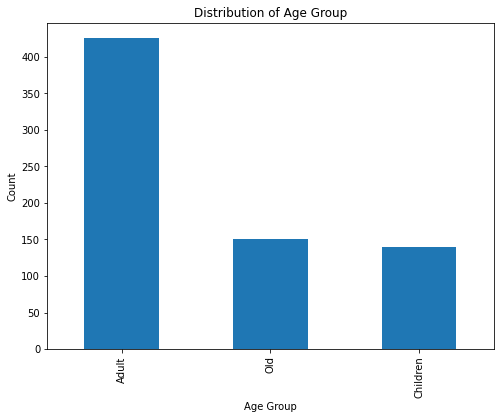

In [21]:
#Checking 'Age_group' distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
new_data['Age_group'].value_counts().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Group')
plt.show()


<AxesSubplot:>

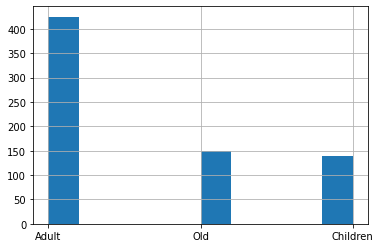

In [22]:
new_data['Age_group'].hist()

###Observation:
It represents the distribution of a continuous variable over a given interval or period of time.



In [24]:
# Count unique value counts for both the columns.
new_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
# Import Label encoder
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()


# Assigning numerical values in column Sex and storing in another column named Sex_encode
data['Sex_encode'] = labelencoder.fit_transform(data['Sex'])


#print data.head()
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [26]:
#Using get_dummies function encode and concat encoded features in data
data=pd.get_dummies(data, columns=['Embarked'])


#data.head()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,0,1


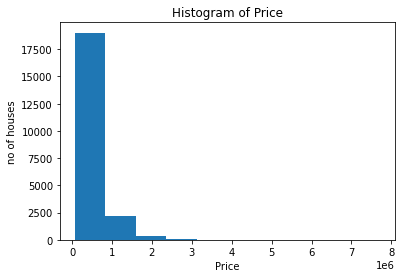

In [36]:
# import pyplot
import matplotlib.pyplot as plt
import statsmodels.api as sm
#reading the data into variable new_data
new_data = pd.read_csv('kc_house_data.csv')
new_data.head()
#plot price histogram
plt.hist(new_data['price']) 
plt.xlabel('Price')
plt.ylabel('no of houses')
plt.title('Histogram of Price')
plt.show()

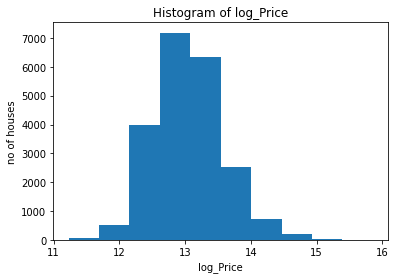

In [37]:
new_data['log_price'] = np.log(new_data['price']+1)
plt.hist(new_data['log_price']) 
plt.xlabel('log_Price')
plt.ylabel('no of houses')
plt.title('Histogram of log_Price')
plt.show()

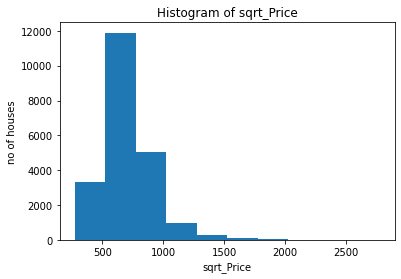

In [38]:
#square root tranform and its distribution
new_data['sqrt_price'] = new_data['price']**(1/2)
plt.hist(new_data['sqrt_price']) 
plt.xlabel('sqrt_Price')
plt.ylabel('no of houses')
plt.title('Histogram of sqrt_Price')
plt.show()

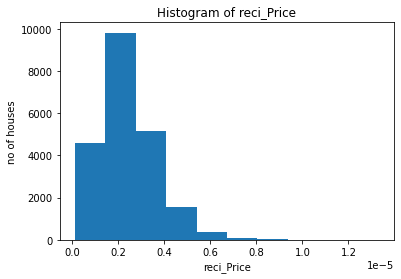

In [40]:
#reciprocal transformation and its plot
new_data['reci_price'] = 1/(new_data['price']+1)
plt.hist(new_data['reci_price']) 
plt.xlabel('reci_Price')
plt.ylabel('no of houses')
plt.title('Histogram of reci_Price')
plt.show()

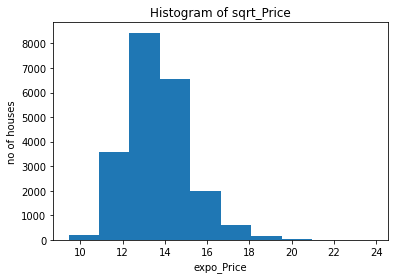

In [42]:
#hint: the below output is when we took exponenent value as 1/8. You can try and check your own value also.
new_data['expo_price'] = new_data['price']**(1/5)
plt.hist(new_data['expo_price']) 
plt.xlabel('expo_Price')
plt.ylabel('no of houses')
plt.title('Histogram of sqrt_Price')
plt.show()

In [47]:
# importing datetime
from datetime import date

In [48]:
#read results.csv
data = pd.read_csv('results.csv')
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [50]:
#Transform string to date of format "%Y-%m-%d"
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')


In [51]:
#Extracting Year from date
data['year'] = data['date'].dt.year


In [52]:
#Extracting Month from date
data['month'] = data['date'].dt.month


In [55]:
#Extracting passed years since the current date
import pandas as pd

current_date = pd.to_datetime('today').date()
data['passed_years'] = (current_date - pd.to_datetime(data['date']).dt.date).dt.days // 365


In [57]:
#Extracting passed months since the current date

current_date = pd.to_datetime('today').date()
data['passed_months'] = (current_date - pd.to_datetime(data['date']).dt.date).dt.days // 30


In [58]:
#Extracting the weekday name from date
import pandas as pd
data['day_name'] = pd.to_datetime(data['date']).dt.day_name()


In [59]:
# Lets check data head for your engineered features
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,passed_years,passed_months,day_name
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,150,1833,Saturday
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,150,1830,Saturday
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,149,1818,Saturday
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,148,1805,Saturday
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,147,1793,Saturday


In [60]:
# check value counts in day_name column
data['day_name'].value_counts()

Sunday       10690
Wednesday    10317
Saturday      7608
Tuesday       5131
Friday        4325
Thursday      3908
Monday        2712
Name: day_name, dtype: int64